# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

**You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.**

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [285]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv", index_col=0)

south_df = pd.read_csv("SouthCallCenter.csv", index_col = 0)

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

In [286]:
north_df.columns, south_df.columns

(Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
        'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
        'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
        'Calls'],
       dtype='object'),
 Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
        'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
        'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
        'Calls'],
       dtype='object'))

In [287]:
north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [288]:
south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [289]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 245 non-null    object 
 1   Call Purpose           245 non-null    object 
 2   Time Block             245 non-null    object 
 3   Incoming or Outgoing   245 non-null    object 
 4   Queue                  245 non-null    object 
 5   Rep ID                 245 non-null    object 
 6   Sale                   245 non-null    object 
 7   Lost Call              245 non-null    int64  
 8   Abandoned              245 non-null    int64  
 9   Busy Minutes           245 non-null    int64  
 10  Not Ready Minutes      245 non-null    int64  
 11  Incoming Wait Time     82 non-null     float64
 12  During Call Wait Time  245 non-null    int64  
 13  Calls                  245 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 28.7+ KB


In [290]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 313
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 314 non-null    object 
 1   Call Purpose           314 non-null    object 
 2   Time Block             314 non-null    object 
 3   Incoming or Outgoing   314 non-null    object 
 4   Queue                  314 non-null    object 
 5   Rep ID                 314 non-null    object 
 6   Sale                   314 non-null    object 
 7   Lost Call              314 non-null    int64  
 8   Abandoned              314 non-null    int64  
 9   Busy Minutes           314 non-null    int64  
 10  Not Ready Minutes      314 non-null    int64  
 11  Incoming Wait Time     126 non-null    float64
 12  During Call Wait Time  314 non-null    int64  
 13  Calls                  314 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 36.8+ KB


#### EDA Question 1A:  How many reps are in the North branch?  

In [291]:
#Code Used:
#north_df["Rep ID"].info()
#pd.concat(g for _, g in north_df.groupby("Rep I") if len(g) > 1)
del_rep_id = north_df.drop_duplicates(subset=["Rep ID"])
del_rep_id

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
11,North,Product Support,4:00 PM,Incoming,A,Amanda,NO,0,0,10,3,1.0,2,1
17,North,Complaint,2:00 PM,Incoming,A,Andy,NO,0,1,9,3,2.0,4,1
27,North,Product Support,3:00 PM,Incoming,B,Xander,NO,0,0,12,1,2.0,4,1


#### EDA Question 1B:  How many reps are in the South branch?  

In [292]:
#Code Used:
#south_df["Rep ID"].info()
#pd.concat(g for _, g in south_df.groupby("Rep I") if len(g) > 1)
del_rep_id = south_df.drop_duplicates(subset=["Rep ID"])
del_rep_id

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1
10,South,Product Support,3:00 PM,Incoming,D,Helga,NO,0,0,9,1,1.0,3,1
11,South,Product Support,4:00 PM,Incoming,D,Josh,NO,0,0,11,3,1.0,3,1


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [293]:
#Code Used:
north_av_list = north_df[["Busy Minutes","Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()
north_av_list

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [294]:
#Code Used:
south_av_list = south_df[["Busy Minutes","Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()
south_av_list

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [295]:
# Code Used:
timeblock_north = north_df["Time Block"].value_counts()
timeblock_south = south_df["Time Block"].value_counts()

timeblocks = pd.concat([timeblock_north + timeblock_south], axis = 1)
timeblocks

,Time Block
10:00 AM,99
11:00 AM,56
12:00 PM,120
1:00 PM,40
2:00 PM,65
3:00 PM,73
4:00 PM,53
5:00 PM,43
9:00 AM,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9 
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.98
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.98
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 
**There is missing data in both dataframes. North call center data has 67% missing in the Incoming Wait Time, and the South Call center has 60% missing in the same column. It looks like the only values found in both datafames is either 1,2,3,4,5 seconds, or NAN. We can replace this with the mean instead. 
Depending on what NAN is, it could either be counted as a missing values because it was possibly less then 1 second, or maybe took more then 5? Either way it would help us to know why there is so many NAN. Maybe it didn't count if it was in milisecond? If the case is that this NAN because it was less then 1 second then maybe we can replace all NAN values with 0 instead?** 

In [296]:
# Code Used
# Add Additional Cells as needed.
####Looking for any missing data in north_df
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [297]:
#Checking to see what are the seconds values in the data
n_null_incoming_wait_time = north_df.drop_duplicates(subset=["Incoming Wait Time"])
print("values", north_df.drop_duplicates(subset=["Incoming Wait Time"])["Incoming Wait Time"].tolist(),".")

values [1.0, 2.0, 3.0, 4.0, 5.0, nan] .


In [298]:
####Looking for any missing data in north_df
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [299]:
#Checking to see what are the seconds values in the data
n_null_incoming_wait_time = south_df.drop_duplicates(subset=["Incoming Wait Time"])
print("values", south_df.drop_duplicates(subset=["Incoming Wait Time"])["Incoming Wait Time"].tolist(),".")

values [1.0, 2.0, 3.0, 4.0, 5.0, nan] .


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: 

In [300]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'] = north_df['Sale'].str.replace(" ", "")
north_df['Sale'].unique()

array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: 

In [301]:
#Code Used
# Add Additional Cells as needed.
north_df_dedupped = north_df.drop_duplicates()

print(north_df.shape)
print(north_df_dedupped.shape)

(245, 14)
(243, 14)


In [302]:
#The duplicate rows
north_df[north_df.duplicated()]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [303]:
south_df_dedupped = south_df.drop_duplicates()

print(south_df.shape)
print(south_df_dedupped.shape)

(314, 14)
(311, 14)


In [304]:
#The duplicate rows
south_df[south_df.duplicated()]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The Sale column can be dropped as this is unnecessary in finding more information on call support time as stated in the question. 

In [305]:
#Code Used
# Add Additional Cells as needed.
south_df.drop(["Sale"], axis=1)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,0,0,10,1,NaN,2,1


In [306]:
north_df.drop(["Sale"], axis=1)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,0,0,11,2,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [307]:
# Create dataframe for the entire company named df
df = north_df.append([south_df])
df

C:\Users\ortiz\AppData\Local\Temp\ipykernel_77180\3262907072.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = north_df.append([south_df])


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls

In [308]:
# Code Used
# Add Additional Cells as needed.
calls_df = df.groupby(["Rep ID"]).sum()
calls_df.sort_values(by="Calls", ascending = False)

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Brent,0,1,362,71,17.0,117,37
Eric,0,0,361,54,47.0,112,35
Randy,3,1,320,66,47.0,98,33
Sandy,1,0,325,60,34.0,100,32
Helga,0,2,292,58,36.0,95,31
Lilly,0,2,307,59,37.0,88,30
Todd,1,0,296,58,21.0,97,29
Duke,2,0,292,56,39.0,85,29
George,0,0,298,53,41.0,87,29


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? 

**No, all of these are within the optimal range of 2-5%.** 

In [309]:
# Code Used
# Add Additional Cells as needed.
print("Average call abandoment rate for North branch: ", north_df['Abandoned'].mean() * 100)
print("Average call abandoment rate for South branch: ", south_df['Abandoned'].mean() * 100)
print("Average call abandoment rate Company Wide: ", df['Abandoned'].mean() * 100)

Average call abandoment rate for North branch:  2.857142857142857
Average call abandoment rate for South branch:  1.2738853503184715
Average call abandoment rate Company Wide:  1.9677996422182469


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47%
- South Branch = 15.29%
- Company Wide = 14.49%

*This percentage is based on the total number of calls, however if we were to do it based only the values not NAN then it might be at a higher percentage. If we had more information as to why there is so many missing values, we could then continue with either dropping the missing values, or we could replace it with a more accurate information.* 

In [310]:
# Code Used
# Add Additional Cells as needed.
north_answered_kpi = north_df["Incoming Wait Time"][north_df["Incoming Wait Time"] <=2].count() 
north_answered_kpi / (north_df["Calls"].value_counts()) * 100

1    13.469388
Name: Calls, dtype: float64

In [311]:
south_answered_kpi = south_df["Incoming Wait Time"][south_df["Incoming Wait Time"] <=2].count() 
south_answered_kpi / (south_df["Calls"].value_counts()) * 100

1    15.286624
Name: Calls, dtype: float64

In [312]:
company_answered_kpi= df["Incoming Wait Time"][df["Incoming Wait Time"] <=2].count() 
company_answered_kpi / (df["Calls"].value_counts()) * 100

1    14.490161
Name: Calls, dtype: float64

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02


In [313]:
# Code Used 
north_avg_speed= north_df['Incoming Wait Time'].mean()
north_avg_speed

3.048780487804878

In [314]:

south_avg_speed= south_df['Incoming Wait Time'].mean()
south_avg_speed

3.0

In [315]:
avg_ans_speed= df['Incoming Wait Time'].mean()
avg_ans_speed

3.019230769230769

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

**After running a test for the abandoment_rates_df, It looks like a very basic set of data. We're only looking at this one relationship between a numeric and a categoric variable. Each entity of the categoric variable (Queue) is represented as a bar. The size of the bar represents its numeric value(Abandonment rate percentage). Maybe simple, but is efficient to show this kind of data relationship.** 

In [316]:
#test
#abandoment_rates_df

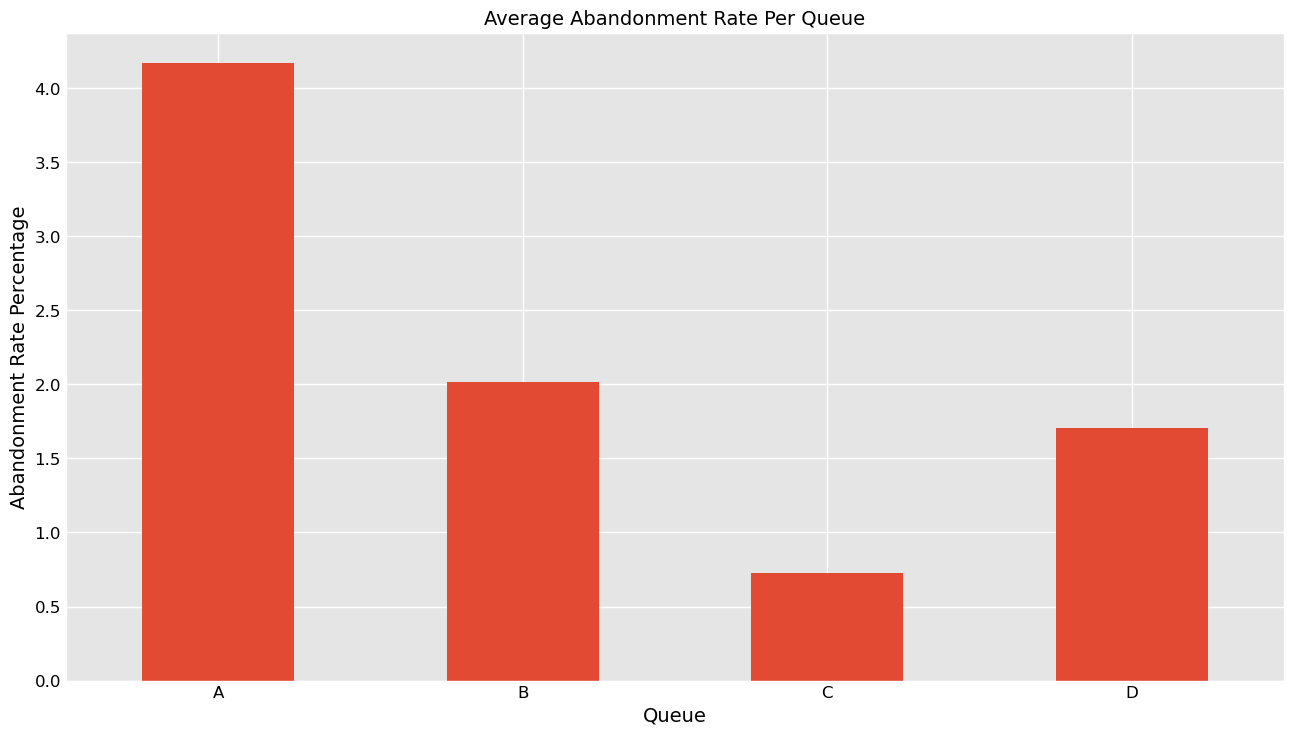

In [317]:
# Create visualization 1 here
# Import any additional libraries needed with alias
from matplotlib import style
style.use('fast')
plt.rcParams['figure.figsize'] = (20,10)


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]*100 
 

    
#Your Code Here:
abandoment_rates_df = pd.DataFrame.from_dict(abandonment_rates, orient = 'index')

abandoment_rates_df.plot(kind = 'bar', legend = False, figsize= (14,8))


plt.title('Average Abandonment Rate Per Queue',fontsize = 14, color= 'black')
plt.yticks(rotation=0,fontsize = 12,color = 'black')
plt.xticks(rotation=0, fontsize = 12,color = 'black')
plt.xlabel('Queue',fontsize = 14, color= 'black')
plt.ylabel('Abandonment Rate Percentage',fontsize = 14, color='black')
plt.savefig('abandoment_rate.png')
plt.show()




#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

**I went with another Bar chat, as we are showing the relationship again between the Rep ID categoric variable, and the numerical variables of the Service Level Percentage. Orginally I wanted to use a Scatter plot, but I realized this involves extra steps in first locating the plot then comparing the color to a legend. This seems redundant, and also would be difficult for someone who is colorblind to decipher. With the bar chat, you can quickly locate the Rep ID with the highest Service Level Percentage. However if we had a larger set then a Lollipop chart could also be useful** 

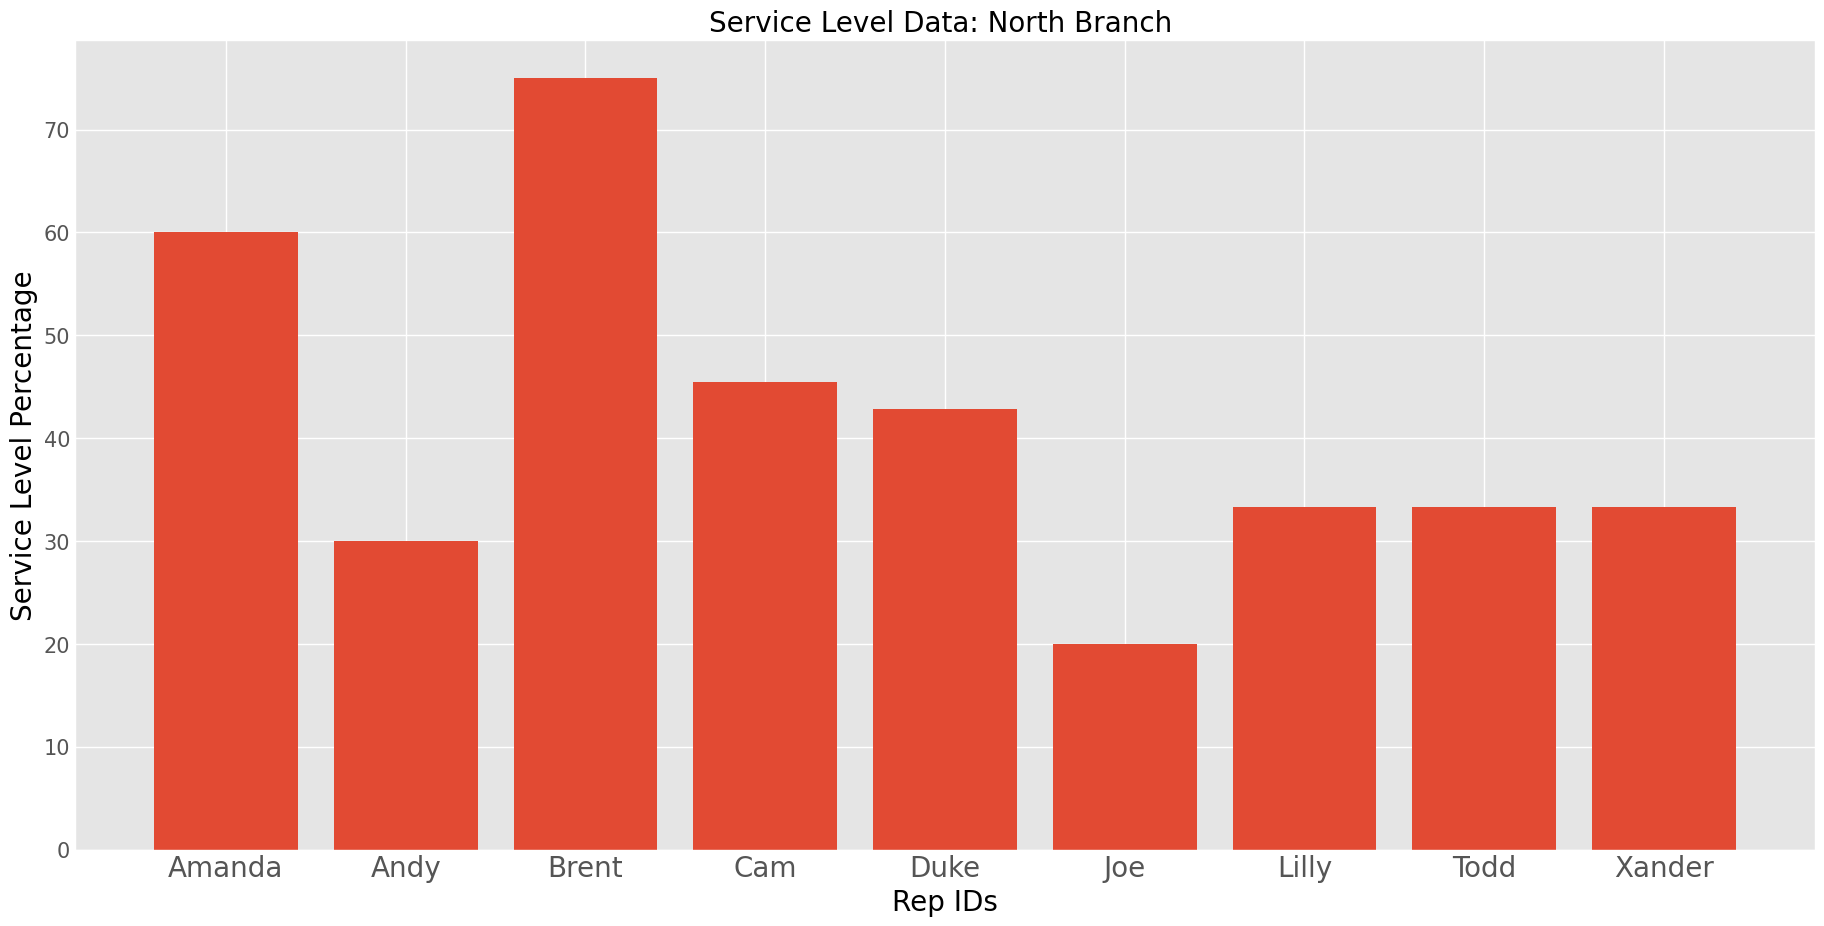

In [353]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

#north_service_level= service_level.merge(north_plt, on='Rep ID', how='outer')
#north_service_level= north_service_level.rename(columns={"Incoming Wait Time": "Incoming Wait Time Avg"})
#north_service_level.reset_index(inplace=True)
#north_service_level= north_service_level.drop(columns=['Calls_x', 'Calls_y'])
north_service_level=north_service_level.sort_values(by=['Incoming Wait Time Avg'],ascending=True)


style.use('fast')

plt.bar(Rep_ID_keys, sl_dict_values, data=north_service_level)


plt.title('Service Level Data: North Branch ', color = 'black', fontsize= 20)
plt.xlabel('Rep IDs',fontsize = 20, color='black')
plt.ylabel('Service Level Percentage',fontsize = 20, color='black')
plt.grid(True)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 15)

plt.show()



#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

**I went with a Stacked bar plot as similar to the bar plot, we can also represent different groups on the highest of 1 another. The peak of the bar depends on the resulting height of the mixture of the results of the groups (Complaint, Product Support, and Sales Support).**

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


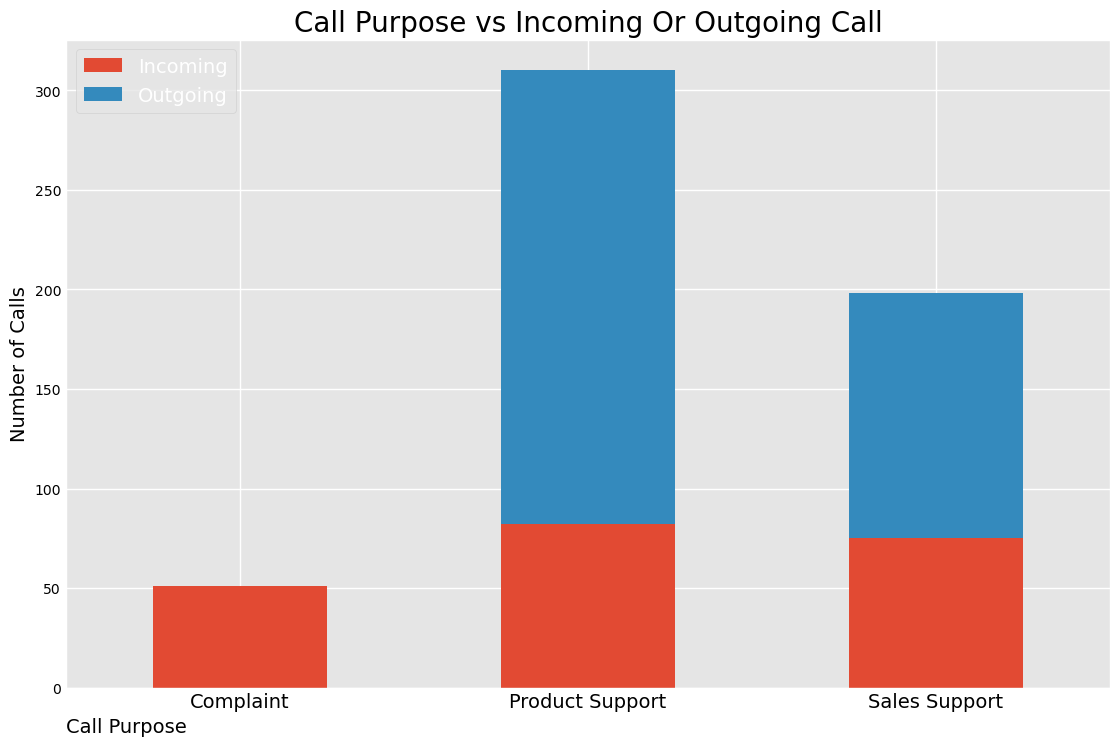

In [319]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

df.groupby(["Call Purpose", "Incoming or Outgoing"]).size().unstack().plot(kind='bar', stacked= True,figsize= (12,8))

style.use('fast')

plt.title('Call Purpose vs Incoming Or Outgoing Call', color = 'black',fontsize = 20)
plt.xticks(color = 'black', rotation=0, fontsize= 14)
plt.yticks(color = 'black')
plt.xlabel('Call Purpose', color = 'black', fontsize = 14, loc='left')
plt.ylabel('Number of Calls', color = 'black', fontsize = 14)
plt.legend(loc= 'upper left', fontsize=14)
plt.savefig('stacked_bar_call.png')

plt.show()




<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [320]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: